In [190]:
## Machine Learning Online Class
#  Exercise 8 | Anomaly Detection and Collaborative Filtering
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     estimateGaussian.m
#     selectThreshold.m
#     cofiCostFunc.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import lib.calc as calc

# 1. 加载数据集

Visualizing example dataset for outlier detection.




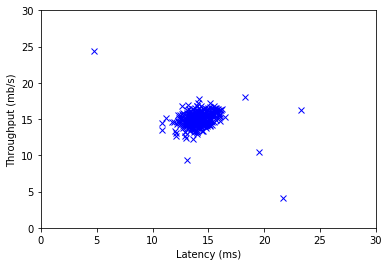

In [208]:
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easy to
#  visualize.
#
#  Our example case consists of 2 network server statistics across
#  several machines: the latency and throughput of each machine.
#  This exercise will help us find possibly faulty (or very fast) machines.
#

print('Visualizing example dataset for outlier detection.\n\n');

#  The following command loads the dataset. You should now have the
#  variables X, Xval, yval in your environment
data1 = scio.loadmat('ex8data1.mat');
X = data1['X']
Xval = data1['Xval']
yval = data1['yval']

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bx');
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');
plt.show()

# 2 估计数据集数据

In [200]:
def estimateGaussian(X):
    #ESTIMATEGAUSSIAN This function estimates the parameters of a 
    #Gaussian distribution using the data in X
    #   [mu sigma2] = estimateGaussian(X), 
    #   The input X is the dataset with each n-dimensional data point in one row
    #   The output is an n-dimensional vector mu, the mean of the data set
    #   and the variances sigma^2, an n x 1 vector
    # 

    # Useful variables
    m, n = X.shape

    # You should return these values correctly
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the mean of the data and the variances
    #               In particular, mu(i) should contain the mean of
    #               the data for the i-th feature and sigma2(i)
    #               should contain variance of the i-th feature.
    #
    mu = np.mean(X, axis = 0)
    
    sigma2 = np.var(X, axis = 0) #np.var就是方差
    
    return mu, sigma2


test case

In [210]:
#X = np.sin(calc.magic(4))
X_test = np.sin(np.array([16,2,3,13,5,11,10,8,9,7,6,12,4,14,15,1]).reshape(4,4))
print(X_test)
X_test = X_test[:,:3]
mu_test, sigma2_test = estimateGaussian(X_test)
mu_test, sigma2_test

[[-0.28790332  0.90929743  0.14112001  0.42016704]
 [-0.95892427 -0.99999021 -0.54402111  0.98935825]
 [ 0.41211849  0.6569866  -0.2794155  -0.53657292]
 [-0.7568025   0.99060736  0.65028784  0.84147098]]


(array([-0.3978779 ,  0.38922529, -0.00800719]),
 array([ 0.27794711,  0.65843781,  0.20414117]))

In [211]:
np.array((16,2,3,13,5,11,10,8,9,7,6,12,4,14,15,1))

array([16,  2,  3, 13,  5, 11, 10,  8,  9,  7,  6, 12,  4, 14, 15,  1])

# magic函数有问题

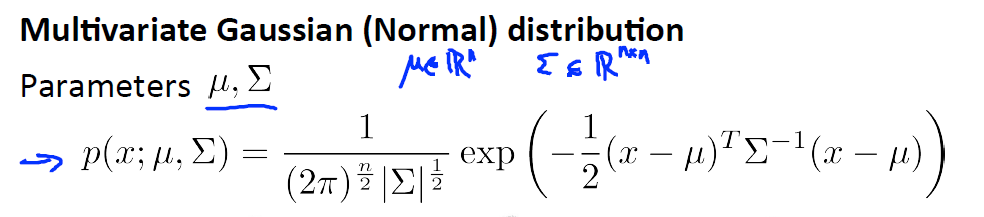

In [212]:
def multivariateGaussian(X, mu, Sigma2):
    #MULTIVARIATEGAUSSIAN Computes the probability density function of the
    #multivariate gaussian distribution.
    #    p = MULTIVARIATEGAUSSIAN(X, mu, Sigma2) Computes the probability 
    #    density function of the examples X under the multivariate gaussian 
    #    distribution with parameters mu and Sigma2. 
    
    #    If Sigma2 is a matrix, it is treated as the covariance matrix. If Sigma2 is a vector, it is treated
    #    as the \sigma^2 values of the variances in each dimension (a diagonal
    #    covariance matrix)
    #

    k = len(mu);
    
    #input value Sigma is a 1-D array, convert it to matrix
    #if (Sigma2.shape[1] == 1) or (Sigma2.shape[0] == 1):
    Sigma2 = np.diag(Sigma2);
    

    #X = bsxfun(@minus, X, mu(:)');
    X = X - mu
    p = (2 * np.pi) ** (- k / 2) * np.linalg.det(Sigma2) ** (-0.5) * \
        np.exp(-0.5 * np.sum((X @ np.linalg.pinv(Sigma2)) * X, axis=1)) # x的公式如何推出此矩阵式？

    return p

In [213]:
def visualizeFit(X, mu, sigma2):
    #VISUALIZEFIT Visualize the dataset and its estimated distribution.
    #   VISUALIZEFIT(X, p, mu, sigma2) This visualization shows you the 
    #   probability density function of the Gaussian distribution. Each example
    #   has a location (x1, x2) that depends on its feature values.
    #
    
    x = np.arange(0,35.5,0.5)
    y = x
    X1,X2 = np.meshgrid(x,y);
    
    Z = multivariateGaussian(np.column_stack((X1.reshape(-1,1), X2.reshape(-1,1))),mu,sigma2)
    Z = np.reshape(Z,X1.shape)

    plt.plot(X[:, 0], X[:, 1],'bx')
    #hold on;
    # Do not plot if there are infinities
    if (np.sum(np.isinf(Z)) == 0):
        plt.contour(X1, X2, Z, 10.**(np.arange(-20,0,3).reshape(-1,1))) 
        # need to set 10 as 10.(float) as Integers to negative integer powers are not allowed
    
    #plt.show()

    

Visualizing Gaussian fit.




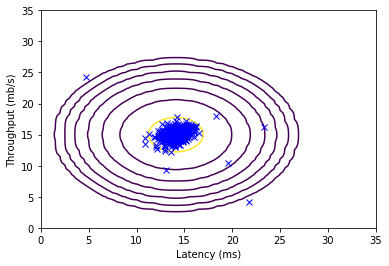

In [214]:
## ================== Part 2: Estimate the dataset statistics ===================
#  For this exercise, we assume a Gaussian distribution for the dataset.
#
#  We first estimate the parameters of our assumed Gaussian distribution, 
#  then compute the probabilities for each of the points and then visualize 
#  both the overall distribution and where each of the points falls in 
#  terms of that distribution.
#
print('Visualizing Gaussian fit.\n\n');

#  Estimate my and sigma2
mu,sigma2 = estimateGaussian(X);

#  Returns the density of the multivariate normal at each data point (row) 
#  of X
p = multivariateGaussian(X, mu, sigma2);

#  Visualize the fit
visualizeFit(X,  mu, sigma2);
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)')
plt.show()

图形和预期结果目测一致

# 3. 寻找异常点

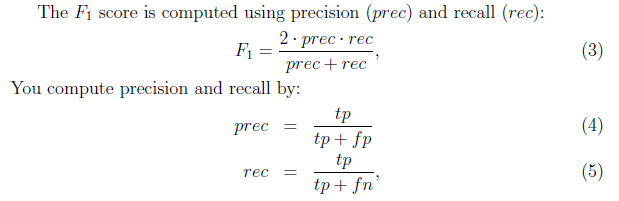

In [218]:
def selectThreshold(yval, pval):
    #SELECTTHRESHOLD Find the best threshold (epsilon) to use for selecting
    #outliers
    #   [bestEpsilon bestF1] = SELECTTHRESHOLD(yval, pval) finds the best
    #   threshold to use for selecting outliers based on the results from a
    #   validation set (pval) and the ground truth (yval).
    #

    bestEpsilon = 0;
    bestF1 = 0;
    F1 = 0;

    stepsize = (np.max(pval) - np.min(pval)) / 1000;
    #print(stepsize)
    for epsilon in np.arange(np.min(pval),max(pval)+stepsize,stepsize):

        # ====================== YOUR CODE HERE ======================
        # Instructions: Compute the F1 score of choosing epsilon as the
        #               threshold and place the value in F1. The code at the
        #               end of the loop will compare the F1 score for this
        #               choice of epsilon and set it to be the best epsilon if
        #               it is better than the current choice of epsilon.
        #               
        # Note: You can use predictions = (pval < epsilon) to get a binary vector
        #       of 0's and 1's of the outlier predictions

        pred = (pval<epsilon).astype(int).reshape(-1,1) # 0 for normal, 1 for anamaly
        tp = np.sum(np.logical_and(yval==1, pred==1)).astype(float)
        fp = np.sum(np.logical_and(yval==0, pred==1)).astype(float)
        fn = np.sum(np.logical_and(yval==1, pred==0)).astype(float)
        #print(tp)
        prec = tp/(tp + fp)
        rec = tp/(tp + fn)
        F1 = 2*prec*rec/(prec+rec)

        # =============================================================

        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon;

    return bestEpsilon, bestF1

注意np.logical_and用法

testcase

In [219]:
selectThreshold(np.array([1,0, 0, 1, 1]).reshape(-1,1), np.array([0.1, 0.2, 0.3, 0.4, 0.5]).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


(0.4003999999999982, 0.57142857142857151)

预期结果：
epsilon =  0.40040
F1 =  0.57143
测试通过

Best epsilon found using cross-validation: 8.990853e-05

Best F1 on Cross Validation Set:  0.875000

   (you should see a value epsilon of about 8.99e-05)

   (you should see a Best F1 value of  0.875000)




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


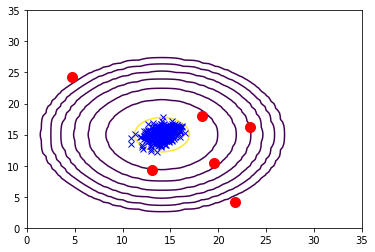

In [220]:
## ================== Part 3: Find Outliers ===================
#  Now you will find a good epsilon threshold using a cross-validation set
#  probabilities given the estimated Gaussian distribution
# 

pval = multivariateGaussian(Xval, mu, sigma2);

epsilon, F1 = selectThreshold(yval, pval);
print('Best epsilon found using cross-validation: %e\n'%epsilon);
print('Best F1 on Cross Validation Set:  %f\n'%F1);
print('   (you should see a value epsilon of about 8.99e-05)\n');
print('   (you should see a Best F1 value of  0.875000)\n\n');

#  Find the outliers in the training set and plot the
#outliers = find(p < epsilon);
outliers = np.where(p < epsilon)

visualizeFit(X,  mu, sigma2);
#  Draw a red circle around those outliers
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', linewidth = 2, markersize = 10)
plt.show()

结果和预期十分接近，但是https://www.coursera.org/learn/machine-learning/discussions/weeks/9/threads/ICB5WtrQEeW0gBLNziwTrw
这个帖子中指出epsilon值等于8.990853e-05是有问题的，待查

# 4. 多维异常值

In [187]:
## ================== Part 4: Multidimensional Outliers ===================
#  We will now use the code from the previous part and apply it to a 
#  harder problem in which more features describe each datapoint and only 
#  some features indicate whether a point is an outlier.
#

#  Loads the second dataset. You should now have the
#  variables X, Xval, yval in your environment
data2 = scio.loadmat('ex8data2.mat');
X = data2['X']
Xval = data2['Xval']
yval = data2['yval']

#  Apply the same steps to the larger dataset
mu, sigma2 = estimateGaussian(X);

#  Training set 
p = multivariateGaussian(X, mu, sigma2);

#  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2);

#  Find the best threshold
epsilon, F1 = selectThreshold(yval, pval);

print('Best epsilon found using cross-validation: %e\n'%epsilon);
print('Best F1 on Cross Validation Set:  %f\n'%F1);
print('   (you should see a value epsilon of about 1.38e-18)\n');
print('   (you should see a Best F1 value of 0.615385)\n');
print('# Outliers found: %d\n\n'%np.sum(p < epsilon));

1.37722883123e-18
Best epsilon found using cross-validation: 1.377229e-18

Best F1 on Cross Validation Set:  0.615385

   (you should see a value epsilon of about 1.38e-18)

   (you should see a Best F1 value of 0.615385)

# Outliers found: 117




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars


epsilon值还是存在精度差异